<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_stat_math/class_03_computer_vision_find_entrance_and_end_maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

fatal: destination path 'Machine_Learning_DataSet' already exists and is not an empty directory.
/content/Machine_Learning_DataSet


In [3]:
img = cv2.imread('maze.png',0)

In [4]:
img.shape

(779, 738)

In [5]:
scale_percent = 10 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)

In [6]:
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [7]:
resized.shape

(77, 73)

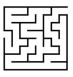

In [8]:
cv2_imshow(resized)

In [9]:
resized[20,:] # 255 represents white

array([255, 255, 254, 126,  26, 237, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 255, 255, 255, 220,  12, 159, 255, 255,
       255, 255, 255, 190,   5, 202, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255, 255, 253, 108,  41, 244, 255, 255, 255, 255,
       252,  80,  61, 253, 255, 255, 255, 255], dtype=uint8)

In [10]:
ret, binary_img = cv2.threshold(resized, 127, 255, cv2.THRESH_BINARY)

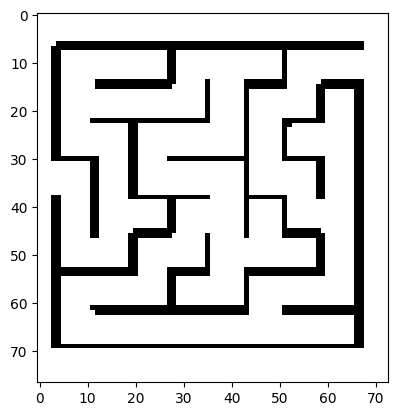

In [11]:
plt.imshow(binary_img,'gray',vmin=0,vmax=255)

In [12]:
rows, cols = binary_img.shape
print(rows,cols)

77 73


In [13]:
def walls(binary_img,rows=rows,cols=cols, row_check = False): 
  # this routine return cols or rows position of walls in a list: 
  #    if you add row_check = True it return rows and otherwise cols
  list_max, list_min = [], []
  for i in range(rows):
    for j in range(cols):
      m =binary_img[i,j]
      if m == 0:
        if row_check == False:
          if j > cols/2:
            list_max.append(j)
          else:
            list_min.append(j)
        else:
          if i > rows/2:
            list_max.append(i)
          else:
            list_min.append(i)
  return list_max, list_min

In [14]:
def freq(list_):
  # this routine return the frequency a item appears in a list as a dict
  frequency = {}
  for item in list_:
    if item in frequency:
        frequency[item] += 1
    else:
        frequency[item] = 1
  return frequency

In [15]:
# key_max is the most frequent wall position using col_max, row_max, row_min and col_min
# key_max for col_max it represent righ
# key_max for col_min represents left
# key_max for row_max represent botton
# key_max for row_min represent top

col_max, col_min = walls(binary_img)
row_max, row_min = walls(binary_img,row_check=True)
freq_row1, freq_row2 = freq(row_min), freq(row_max)
freq_col1, freq_col2 = freq(col_min), freq(col_max)
list_all = [freq_col1,freq_col2,freq_row1,freq_row2]
labels = ['col min','col max','row min','row max']
k = 0
for list_ in list_all:
  key_max = max(list_, key=list_.get)
  print(key_max, list_[key_max], labels[k]) 
  k += 1


4 57 col min
66 58 col max
7 65 row min
69 65 row max


In [16]:
nref = 5
def find(img, id_min,id_max,rows=rows, cols=cols,N =nref, row = False):
  
  positions =[]
  score = []
  if row == False:
    for j in [id_min[1], id_max[1]]:
      max_sum = 0
      for i in range(rows-N):
        total = 0
        if i > id_min[0] and i < id_max[0]:
          for k in range(N):
            total += img[i+k,j]
            if max_sum < total:
              idx, idy = i, j
              max_sum = total
      if max_sum > 0:
        positions.append([idx,idy])
        score.append(max_sum)
  else:
    for i in [id_min[0],id_max[0]]:
      max_sum = 0
      for j in range(cols-N):
        total = 0
        if j > id_min[1] and j < id_max[1]:
          for k in range(N):
            total += img[i,j+k]
        if total == 0:
            if max_sum < total:
              idx, idy = i, j
              max_sum = total
      if max_sum > 0:
        positions.append([idx,idy])
        score.append(max_sum)

  return positions, score
        


In [17]:
tol = 0
id_min = [7+tol,4+tol]
id_max = [69-tol, 66-tol]
find(binary_img,id_min,id_max)

([[31, 4], [8, 66]], [1275, 1275])

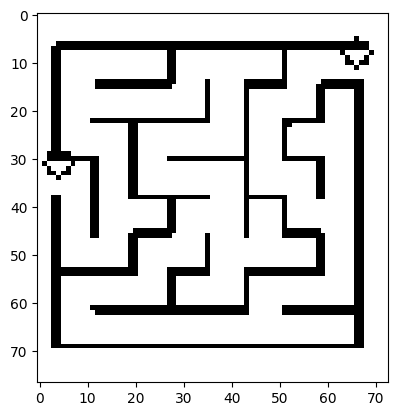

In [18]:
positions,score =find(binary_img,id_min,id_max)
yc,xc = positions[0]
image = cv2.circle(binary_img, (xc,yc), radius=3, color=[0,0,255], thickness=1)
yc,xc = positions[1]
image = cv2.circle(image, (xc,yc), radius=3, color=[0,0,255], thickness=1)
plt.imshow(image,'gray',vmin=0,vmax=255)

In [19]:
find(binary_img,id_min,id_max, row = True)

([], [])

In [20]:
nref = 5
def find_improved(img, id_min,id_max,rows=rows, cols=cols,N =nref):
  
  positions =[]
  score = []

  for j in [id_min[1], id_max[1]]:
    max_sum = 0
    for i in range(rows-N):
      total = 0
      if i > id_min[0] and i < id_max[0]:
        for k in range(N):
          total += img[i+k,j]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)

  for i in [id_min[0],id_max[0]]:
    max_sum = 0
    for j in range(cols-N):
      total = 0
      if j > id_min[1] and j < id_max[1]:
        for k in range(N):
          total += img[i,j+k]
          if max_sum < total:
            idx, idy = i, j
            max_sum = total
    if max_sum > 0:
      positions.append([idx,idy])
      score.append(max_sum)
  k = 0
  x =np.array(score)
  ind = np.argsort(x)
  pos  = [positions[ind[-1]],positions[ind[-2]]]
  sco  = [score[ind[-1]],score[ind[-2]]]

  return pos, sco
        

In [21]:
find_improved(binary_img,id_min,id_max)

([[8, 66], [31, 4]], [1020, 1020])